In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Fitness_Sortie_Du_Cul.txt", sep=";")

data.head()

,mean,stdev,acceptation,E(fitness),sigma(fitness),Generation,fitness1,"Genes(Scores(0,1),:)",fitness50,"Genes(Scores(49,1),:)",fitness100,"Genes(Scores(99,1),:)",Unnamed: 12
0,0,10,1,-2447.320,4419.510,0,-36.8714,"[-1.3046, -3.66319, -8.13673, -15.4664, 7.092...",-620.3600,"-9.83473, 0.0269284, 16.2435, -1.70081, -3.01...",-30240.00,"-22.3159, -5.79227, -2.04465, -9.9448, -8.643...",NaN
1,0,10,1,-1092.730,1601.440,1,-36.8714,"[-1.3046, -3.66319, -8.13673, -15.4664, 7.092...",-336.6810,"-12.0313, -20.0334, -10.4173, -4.18112, 15.32...",-7591.68,"-0.847339, 3.17929, 8.70477, -0.742194, 2.984...",NaN
2,0,10,1,-823.232,1467.520,2,-37.2808,"[-8.35286, -2.19448, -2.41993, 10.1156, -14.8...",-202.1420,"-15.4024, -5.5619, 6.13494, -4.24152, 11.8008...",-8537.13,"-8.3245, 26.1501, 9.98586, -5.89492, 2.01378,...",NaN
3,0,10,1,-391.450,719.869,3,-37.2808,"[-8.35286, -2.19448, -2.41993, 10.1156, -14.8...",-123.0990,"-9.00541, 7.05083, -20.3752, 0.597605, -2.370...",-5435.13,"-0.32587, -1.16041, -0.687609, 4.31353, -4.18...",NaN
4,0,10,1,-715.213,3090.140,4,-38.7274,"[4.5509, -7.78077, -15.1433, 18.0734, 5.86588...",-69.9941,"-9.00541, -5.5619, -17.9236, -7.68193, -2.370...",-30224.10,"-21.2234, -16.504, -0.00832016, 19.5092, -4.4...",NaN


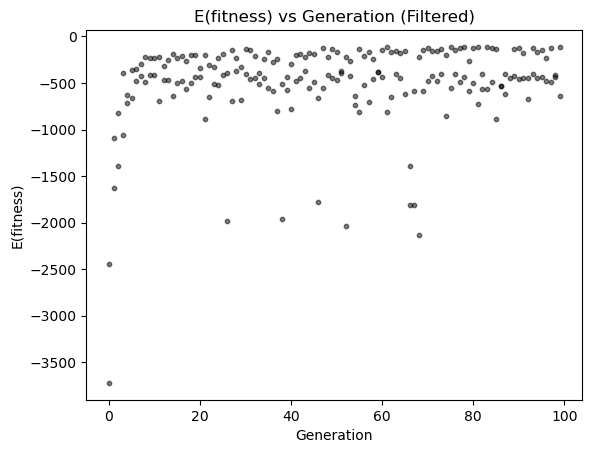

In [42]:
treshold = -4000
dataf = data[(data["E(fitness)"] >= treshold)]

plt.scatter(dataf["Generation"], dataf["E(fitness)"], c="k", alpha=0.5, s=10)
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.show()

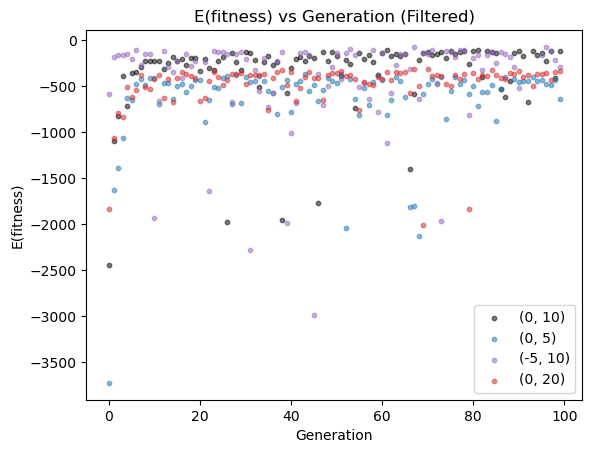

In [52]:
Values = [(0, 10, -4000, "k"), (0, 5, -4000, "tab:blue"), (-5, 10, -5000, "tab:purple"), (0, 20, -2500, "tab:red")]

for i in range(len(Values)):
    mean = Values[i][0]
    stdev = Values[i][1]
    treshold = Values[i][2]
    color = Values[i][3]
    dataf = data[((data["E(fitness)"] >= treshold) & (data["mean"] == mean) & (data["stdev"] == stdev))]

    plt.scatter(dataf["Generation"], dataf["E(fitness)"], c=color, alpha=0.5, s=10, label=f'({mean}, {stdev})')
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.legend()
plt.show()

In [147]:
def Visualiser_data(mean, stdev, acceptation, Name):
    A = np.array([])
    B = [str(mean), str(stdev), str(acceptation)]

    df = data[((data["mean"] == mean) & (data["stdev"] == stdev) & data["acceptation"] == acceptation)]

    mask = (df["Generation"] == 0)

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))


    mask = (df["fitness1"] == df["fitness1"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    mask = (df["Generation"] == df["Generation"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    with open(Name, "w") as file:
        # Write each string to the file
        for string in B:
            file.write(string + "\n")

In [148]:
mean = 0
stdev = 10
acceptation = 1
Name = "test.txt"
Visualiser_data(mean, stdev, acceptation, Name)